In [25]:
from matplotlib import pyplot as plt
import numpy as np

In [26]:
ave_dx = np.loadtxt("ave/ave_60_dx.csv", delimiter=',')
ave_dy = np.loadtxt("ave/ave_60_dy.csv", delimiter=',')

In [27]:
width, height = 739, 692
n = 32

x, y = np.meshgrid(np.linspace(0, width, n, dtype="int"), np.linspace(0, height, n, dtype="int"))

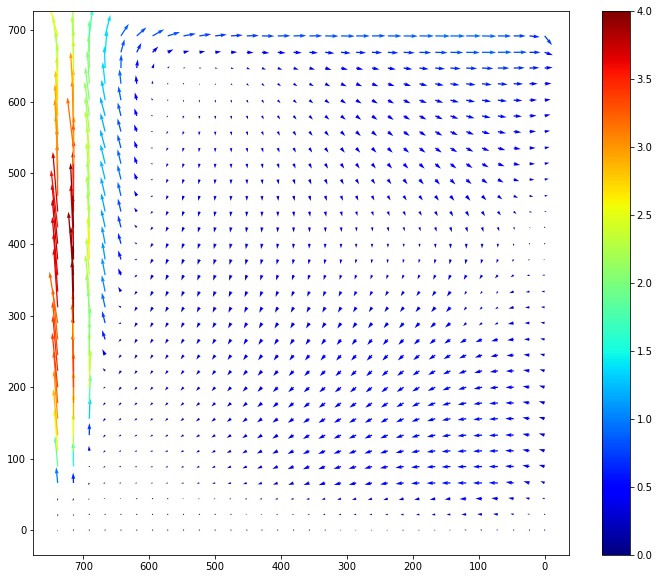

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))
c = np.sqrt(ave_dx**2 + ave_dy**2)
im = ax.quiver(x, y, -ave_dx, ave_dy, c, cmap="jet")
ax.invert_xaxis()
fig.colorbar(im)
im.set_clim(0, 4)
plt.show()